In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [5]:
# Create an engine that can talk to the database
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# View column names in our tables
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x8f6d070>,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [11]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x8f6da00>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [12]:
# Inspect database using Inspector
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [13]:
# Inspect each table column names and types
m_columns = inspector.get_columns('measurement')
for column in m_columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Inspect each table column names and types
s_columns = inspector.get_columns('station')
for column in s_columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [24]:
# Calculate the date 1 year ago from the last data point in the database
last_data_point = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_data_point

('2017-08-23')

In [25]:
# Date 1 year ago
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("The Date 1 year ago:", year_ago)
                                            

The Date 1 year ago: 2016-08-23


In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the date and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').\
                     group_by(Measurement.date).all()
precipitation_data        
           

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [28]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_data)
precipitation_df.set_index('date', inplace=True)
precipitation_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [29]:
# Sort the dataframe by date
precipitation_df.sort_values('date')
precipitation_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [30]:
# Rename prcp column
precipitation_df.rename(columns={"prcp": "Precipitation"}, inplace=True)
precipitation_df.head()

,Precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


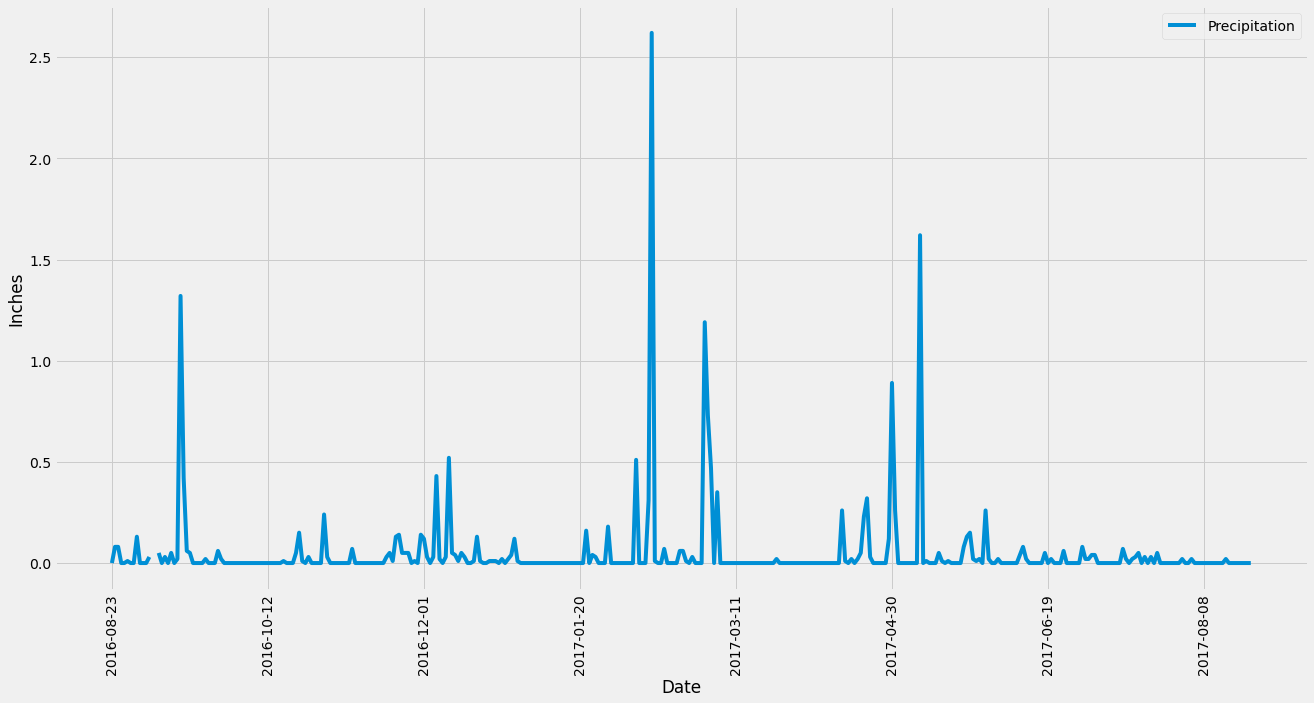

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precipitation_df.plot(figsize=(20, 10))
ax.set_xlabel("Date")
ax.set_ylabel("Inches")

plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [33]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.id).count()
stations

9

In [34]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = (session.query(Measurement.station, func.count(Measurement.station))
                .group_by(Measurement.station)
                .order_by(func.count(Measurement.station).desc()).all())
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temperature = session.query(func.min(Measurement.tobs)).filter(Measurement.station =='USC00519281').all()

highest_temperature = session.query(func.max(Measurement.tobs)).filter(Measurement.station =='USC00519281').all()

average_temperature = session.query(func.avg(Measurement.tobs)).filter(Measurement.station =='USC00519281').all()

print(f"The lowest temperature in Station USC00519281 is {lowest_temperature}.")
print(f"The highest temperature in Station USC00519281 is {highest_temperature}.")
print(f"The average temperature in Station USC00519281 is {average_temperature}.")

The lowest temperature in Station USC00519281 is [(54.0,)].
The highest temperature in Station USC00519281 is [(85.0,)].
The average temperature in Station USC00519281 is [(71.66378066378067,)].


In [36]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observation = session.query(Measurement.date, Measurement.tobs).\
                    filter(Measurement.station =='USC00519281').\
                    filter(Measurement.date >= '2016-08-23').all()
temp_observation      



[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [37]:
# Save the query results as a Pandas DataFrame and set the index to the date column
temp_observation_df = pd.DataFrame(temp_observation)
temp_observation_df.set_index('date', inplace=True)
temp_observation_df.head()

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


In [38]:
# Sort the dataframe by date
temp_observation_df.sort_values('date')
temp_observation_df.head()

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


In [39]:
# Rename tobs column
temp_observation_df.rename(columns={"tobs": "Temperature"}, inplace=True)
temp_observation_df.head()

,Temperature
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


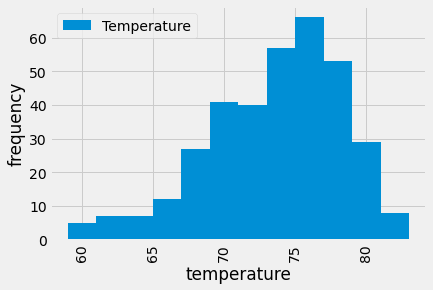

In [40]:
# Use Pandas Plotting with Matplotlib to plot the results as a histogram
ax = temp_observation_df.plot.hist(bins=12)
ax.set_xlabel("temperature")
ax.set_ylabel("frequency")

plt.xticks(rotation=90)
plt.legend(loc="upper left")

## Bonus Challenge Assignment

In [42]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [47]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_temps = calc_temps('2014-02-28', '2014-03-05')
trip_temps

[(57.0, 67.64444444444445, 76.0)]

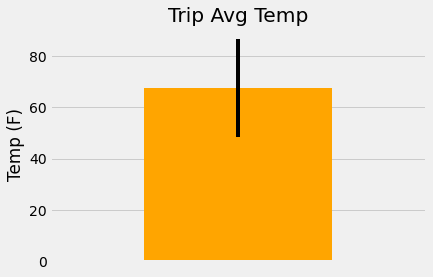

In [48]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_avgtemp_df = pd.DataFrame(trip_temps, columns=['TMIN', 'TAVE', 'TMAX'])
trip_avgtemp_df

y_value = trip_avgtemp_df['TAVE']
y_value

yerr = trip_avgtemp_df['TMAX'] - trip_avgtemp_df['TMIN']
yerr


y_value.plot(kind='bar', yerr=yerr, color='orange')
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.xticks([])
plt.show()


In [49]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)] 
rainfall = session.query(*sel).\
                filter(Measurement.station == Station.station).\
                filter(Measurement.date >= '2014-02-28').\
                filter(Measurement.date <= '2014-03-05').\
                group_by(Measurement.station).\
                order_by(func.sum(Measurement.prcp).desc()).all()

for record in rainfall:
    (s_sta, s_name, s_lat, s_long, s_ele, m_prcp) = record
    print(
        f"Station Data: '{s_sta} {s_name} {s_lat} {s_long} {s_ele}'"
        f"Total Rainfall: '{m_prcp}'")

Station Data: 'USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'Total Rainfall: '1.5'
Station Data: 'USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9'Total Rainfall: '1.02'
Station Data: 'USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'Total Rainfall: '0.93'
Station Data: 'USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'Total Rainfall: '0.89'
Station Data: 'USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6'Total Rainfall: '0.8'
Station Data: 'USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'Total Rainfall: '0.64'
Station Data: 'USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'Total Rainfall: '0.48'
Station Data: 'USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9'Total Rainfall: '0.03'


In [50]:
rainfall_df = pd.DataFrame(rainfall, columns = ["Station", "Name", "Latitude", "Longitude",
                                                "Elevation", "Total Rainfall"])
rainfall_df

,Station,Name,Latitude,Longitude,Elevation,Total Rainfall
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1.50
1,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,1.02
2,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.93
3,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.89
4,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.80
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.64
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.48
7,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.03


In [75]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [85]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals = []

# Set the start and end date of the trip
# start_date = "2014-02-28"
# end_date = "2014-03-05"


# Use the start and end date to create a range of dates
# trip_dates = []
# trip_dates = pd.date_range(start_date, end_date).tolist()
# trip_dates_df = pd.DataFrame(trip_dates)
# trip_dates_df 


# Stip off the year and save a list of %m-%d strings
trip_dates = ['02-28', '03-01', '03-02', '03-03', '03-04', '03-05']

# Loop through the list of %m-%d strings and calculate the normals for each date
for trip_date in trip_dates:
    day = {}
    day['Date'] = trip_date
    daily_norm = daily_normals(trip_date)
    day['Min'] = daily_norm[0][0]
    day['Avg'] = daily_norm[0][1]
    day['Max'] = daily_norm[0][2]
    normals.append(day)
    
normals

[{'Date': '02-28', 'Min': 65.0, 'Avg': 70.65517241379311, 'Max': 80.0},
 {'Date': '03-01', 'Min': 64.0, 'Avg': 70.0327868852459, 'Max': 76.0},
 {'Date': '03-02', 'Min': 61.0, 'Avg': 70.36666666666666, 'Max': 78.0},
 {'Date': '03-03', 'Min': 60.0, 'Avg': 70.06896551724138, 'Max': 78.0},
 {'Date': '03-04', 'Min': 57.0, 'Avg': 69.27272727272727, 'Max': 77.0},
 {'Date': '03-05', 'Min': 60.0, 'Avg': 67.89090909090909, 'Max': 76.0}]

In [86]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals)
normals_df.set_index('Date', inplace=True)
normals_df

,Min,Avg,Max
Date,,,
02-28,65.0,70.655172,80.0
03-01,64.0,70.032787,76.0
03-02,61.0,70.366667,78.0
03-03,60.0,70.068966,78.0
03-04,57.0,69.272727,77.0
03-05,60.0,67.890909,76.0


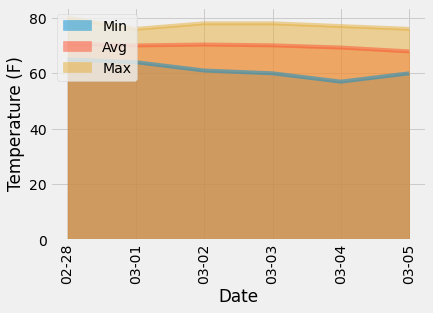

In [87]:
# Plot the daily normals as an area plot with `stacked=False`
ax = normals_df.plot.area(stacked = False)
ax.set_xlabel("Date")
ax.set_ylabel("Temperature (F)")

plt.xticks(rotation=90)
plt.legend(loc="upper left")